# 对电子病历语料库 使用HMM进行NER 命名实体识别

### 隐马尔可夫模型（Hidden Markov Model，HMM）

隐马尔可夫模型描述由一个隐藏的马尔可夫链随机生成不可观测的状态随机序列，再由各个状态生成一个观测而产生观测随机序列的过程。隐马尔可夫模型由初始状态分布，状态转移概率矩阵以及观测概率矩阵所确定

命名实体识别本质上可以看成是一种序列标注问题，在使用HMM解决命名实体识别的时候，我们所能观测到的是字组成的序列（观测序列），观测不到的是每个字对应的标注tag(状态序列)

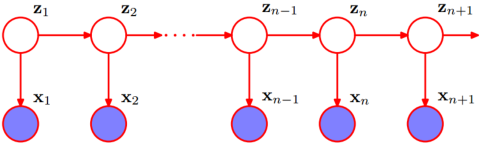

**初始状态分布**:每一个标注的初始化概率

**状态转移概率矩阵**：由某一个标注转移到下一个标注的概率（就是若前一个词的标注为$tag_i$,则下一个词的标注为$tag_j$的概率为$A_{ij}$）

**观测概率矩阵**：在某个标注下，生成某个词的概率

概率计算问题：前向-后向算法

学习问题：观测序列和隐状态序列都已知时，所以直接使用最大似然估计监督学习；只给出观测序列，隐状态序列未知时，使用Baum-Welch算法进行非监督学习。我们这里由于隐状态序列已知，所以直接使用监督学习

预测问题/解码问题：Viterbi算法求解最优路径

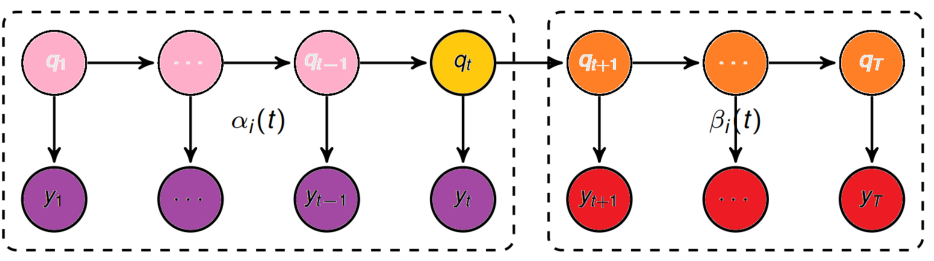 

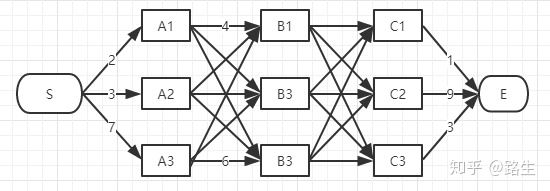

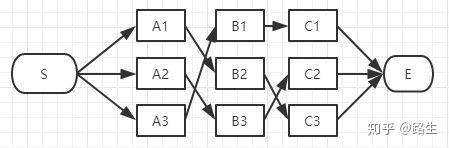

### 病历语料库

面向电子病历的命名实体识别，简称CNER （Clinical Named Entity Recognition）。即对于给定的一组电子病历文档（纯文本文件），任务的目标是识别并抽取出与医学临床相关的实体名字（entity mention），并将它们归类到预先定义好的类别（pre-defined categories），比如疾病、症状、检查等。

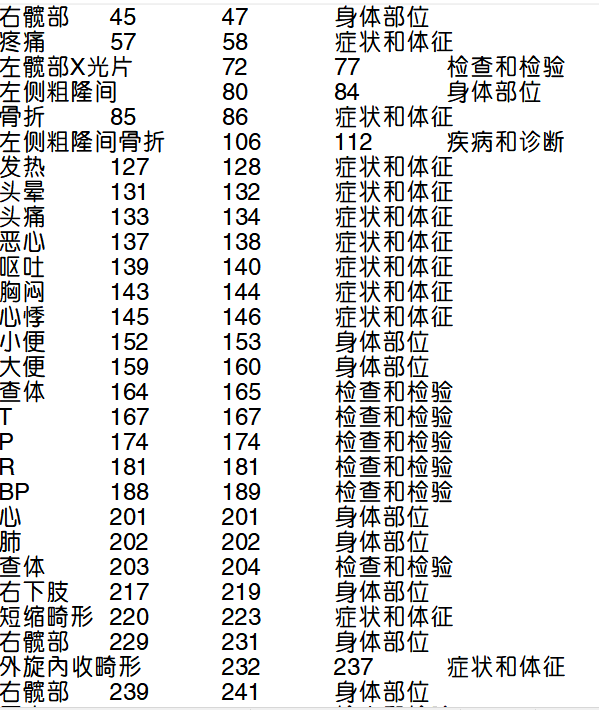

B-Body I-Body

### 数据处理

#### 把数据处理成所有汇集在一起，按照字母tag进行分类，不属于任何类别的赋予tag O

In [1]:
import pandas as pd

In [2]:
#显示dataframe所有行
pd.set_option('display.max_rows',None)

In [3]:
#训练数据
list_character=[]
list_character_original=[]
for i in range(1,251):
    path1='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/病史特点/病史特点-'+str(i)+'.txt'
    with open(path1,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_character.append(my_data)
    
    path2='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/病史特点/病史特点-'+str(i)+'.txtoriginal.txt'
    with open(path2,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_character_original.append(my_data)
    
#测试数据
list_character_test=[]
list_character_original_test=[]
for i in range(251,301):
    path1='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/病史特点/病史特点-'+str(i)+'.txt'
    with open(path1,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_character_test.append(my_data)
    
    path2='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/病史特点/病史特点-'+str(i)+'.txtoriginal.txt'
    with open(path2,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_character_original_test.append(my_data)

In [4]:
#经过观察得知数据中没有出院情况191的文件，所以跳过读取
list_situation=[]
list_situation_original=[]
for i in range(51,301):
    if i==191:
        continue
    path1='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/出院情况/出院情况-'+str(i)+'.txt'
    with open(path1,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_situation.append(my_data)
    
    path2='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/出院情况/出院情况-'+str(i)+'.txtoriginal.txt'
    with open(path2,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_situation_original.append(my_data)
    
    
list_situation_test=[]
list_situation_original_test=[]
for i in range(1,51):
    path1='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/出院情况/出院情况-'+str(i)+'.txt'
    with open(path1,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_situation_test.append(my_data)
    
    path2='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/出院情况/出院情况-'+str(i)+'.txtoriginal.txt'
    with open(path2,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_situation_original_test.append(my_data)

In [5]:
list_normal=[]
list_normal_original=[]
for i in range(1,201):
    path1='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/一般项目/一般项目-'+str(i)+'.txt'
    with open(path1,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_normal.append(my_data)
    
    path2='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/一般项目/一般项目-'+str(i)+'.txtoriginal.txt'
    with open(path2,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_normal_original.append(my_data)
    

for i in range(251,301):
    path1='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/一般项目/一般项目-'+str(i)+'.txt'
    with open(path1,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_normal.append(my_data)
    
    path2='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/一般项目/一般项目-'+str(i)+'.txtoriginal.txt'
    with open(path2,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_normal_original.append(my_data)
    
list_normal_test=[]
list_normal_original_test=[]
for i in range(201,251):
    path1='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/一般项目/一般项目-'+str(i)+'.txt'
    with open(path1,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_normal_test.append(my_data)
    
    path2='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/一般项目/一般项目-'+str(i)+'.txtoriginal.txt'
    with open(path2,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_normal_original_test.append(my_data)

In [6]:
#经过观察得知数据中没有诊疗经过191的文件，所以跳过读取
list_diagnose=[]
list_diagnose_original=[]
for i in range(1,151):
    path1='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/诊疗经过/诊疗经过-'+str(i)+'.txt'
    with open(path1,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_diagnose.append(my_data)
    
    path2='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/诊疗经过/诊疗经过-'+str(i)+'.txtoriginal.txt'
    with open(path2,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_diagnose_original.append(my_data)
    
for i in range(201,301):
    path1='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/诊疗经过/诊疗经过-'+str(i)+'.txt'
    with open(path1,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_diagnose.append(my_data)
    
    path2='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/诊疗经过/诊疗经过-'+str(i)+'.txtoriginal.txt'
    with open(path2,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_diagnose_original.append(my_data)
    
list_diagnose_test=[]
list_diagnose_original_test=[]
for i in range(151,201):
    if i==191:
        continue
    path1='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/诊疗经过/诊疗经过-'+str(i)+'.txt'
    with open(path1,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_diagnose_test.append(my_data)
    
    path2='C:/Users/yuki/Desktop/NER/病历命名实体识别/数据/诊疗经过/诊疗经过-'+str(i)+'.txtoriginal.txt'
    with open(path2,encoding='UTF-8') as f:
        my_data=f.readlines()    
    list_diagnose_original_test.append(my_data)

In [7]:
data_list=['list_situation','list_character','list_normal','list_diagnose']
data_list_test=['list_situation_test','list_character_test','list_normal_test','list_diagnose_test']
#把数据中的换行符等符号\t \n删去
for data_name in data_list:
    for item in eval(data_name):
        for i in range(0,len(item)):
            item[i]=item[i].replace('\t',' ')
            item[i]=item[i].replace('\n','')
            
for data_name in data_list_test:
    for item in eval(data_name):
        for i in range(0,len(item)):
            item[i]=item[i].replace('\t',' ')
            item[i]=item[i].replace('\n','')

In [8]:
data_original_list=['list_situation_original','list_character_original','list_normal_original','list_diagnose_original']
data_original_list_test=['list_situation_original_test','list_character_original_test','list_normal_original_test','list_diagnose_original_test']

for data_name in data_original_list:
    for item in eval(data_name):
        for i in range(0,len(item)):
            item[i]=item[i].replace('\n','')
            
for data_name in data_original_list_test:
    for item in eval(data_name):
        for i in range(0,len(item)):
            item[i]=item[i].replace('\n','')

In [9]:
#删除空列表值
for data_name in data_original_list:
    for i in range(0,len(eval(data_name))):
        eval(data_name)[i]=eval(data_name)[i][0]
        

for data_name in data_original_list_test:
    for i in range(0,len(eval(data_name))):
        eval(data_name)[i]=eval(data_name)[i][0]

In [10]:
#把标注过的数据 实体 位置 标注tag分开
for data_name in data_list:
    for item in eval(data_name):
        for i in range(0,len(item)):
            item[i]=item[i].split()
            if len(item[i])!=4:
                strr=''
                for str_tag in item[i][:-3]:
                    strr+=str_tag
                item[i]=[strr]+item[i][-3:]


for data_name in data_list_test:
    for item in eval(data_name):
        for i in range(0,len(item)):
            item[i]=item[i].split()
            if len(item[i])!=4:
                strr=''
                for str_tag in item[i][:-3]:
                    strr+=str_tag
                item[i]=[strr]+item[i][-3:]

In [11]:
df_situ=pd.DataFrame()
df_chara=pd.DataFrame()
df_norm=pd.DataFrame()
df_diag=pd.DataFrame()
df_list=['df_situ','df_chara','df_norm','df_diag']
df_situ_test=pd.DataFrame()
df_chara_test=pd.DataFrame()
df_norm_test=pd.DataFrame()
df_diag_test=pd.DataFrame()
df_list_test=['df_situ_test','df_chara_test','df_norm_test','df_diag_test']

tag_dict={'症状和体征':['B-SYMPTOM','I-SYMPTOM'],'身体部位':['B-BODY','I-BODY'],\
          '检查和检验':['B-CHECK','I-CHECK'],'疾病和诊断':['B-DIAGNOSE','I-DIAGNOSE'],\
          '治疗':['B-TREAT','I-TREAT']}

In [12]:
#建立训练集数据框
for df_name in df_list:
    for data_name_index in range(0,len(data_original_list)):
        for i in range(0,len(eval(data_original_list[data_name_index]))):
            temp=pd.DataFrame(list(eval(data_original_list[data_name_index])[i]))
            temp['tag']='O'
            #加一行空行 表示更换下一个文件
            new_temp=pd.DataFrame({0:' ','tag':' '},index=[1])
            temp=temp.append(new_temp,ignore_index=True) # ignore_index=True,表示不按原来的索引，从0开始自动递增
            index=eval(data_list[data_name_index])[i]
            for tag_index in index:
                index1=eval(tag_index[1])
                index2=eval(tag_index[2])
                tag=tag_index[3]
                temp['tag'][index1]=tag_dict[tag][0]
                temp['tag'][index1+1:index2+1]=tag_dict[tag][1]
            if data_name_index==0:
                df_situ=pd.concat([df_situ,temp])
            elif data_name_index==1:
                df_chara=pd.concat([df_chara,temp])
            elif data_name_index==2:
                df_norm=pd.concat([df_norm,temp])
            elif data_name_index==3:
                df_diag=pd.concat([df_diag,temp])

In [13]:
#建立ceshi集数据框
for df_name in df_list_test:
    for data_name_index in range(0,len(data_original_list_test)):
        for i in range(0,len(eval(data_original_list_test[data_name_index]))):
            temp=pd.DataFrame(list(eval(data_original_list_test[data_name_index])[i]))
            temp['tag']='O'
            #加一行空行 表示更换下一个文件
            new_temp=pd.DataFrame({0:' ','tag':' '},index=[1])
            temp=temp.append(new_temp,ignore_index=True) # ignore_index=True,表示不按原来的索引，从0开始自动递增
            index=eval(data_list_test[data_name_index])[i]
            for tag_index in index:
                index1=eval(tag_index[1])
                index2=eval(tag_index[2])
                tag=tag_index[3]
                temp['tag'][index1]=tag_dict[tag][0]
                temp['tag'][index1+1:index2+1]=tag_dict[tag][1]
            if data_name_index==0:
                df_situ_test=pd.concat([df_situ_test,temp])
            elif data_name_index==1:
                df_chara_test=pd.concat([df_chara_test,temp])
            elif data_name_index==2:
                df_norm_test=pd.concat([df_norm_test,temp])
            elif data_name_index==3:
                df_diag_test=pd.concat([df_diag_test,temp])

In [14]:
#df汇总 index重设
new_temp=pd.DataFrame({0:' ','tag':' '},index=[1])

df_train=pd.concat([df_situ,new_temp,df_chara,new_temp,df_norm,new_temp,df_diag])
df_train=df_train.reset_index()


df_test=pd.concat([df_situ_test,new_temp,df_chara_test,new_temp\
                   ,df_norm_test,new_temp,df_diag_test])
df_test=df_test.reset_index()

In [15]:
del df_train['index']
del df_test['index']

In [17]:
df_train[:100]

,0,tag
0,患,O
1,者,O
2,精,O
3,神,O
4,状,O
5,况,O
6,可,O
7,，,O
8,未,O
9,诉,O


### 模型建立

In [18]:
import numpy as np
from numpy import random
from tqdm import tqdm

In [19]:
#define HMM_model
class HMM_model:
    def __init__(self):
        #首先标记需要标记成的一些命名tag，转为数字id
        self.tag_id = {'B-SYMPTOM': 0,
                       'I-SYMPTOM': 1,
                       'B-CHECK': 2,
                       'I-CHECK': 3,
                       'B-DIAGNOSE': 4,
                       'I-DIAGNOSE': 5,
                       'B-TREAT' : 6,
                       'I-TREAT' : 7,
                       'B-BODY':8,
                       'I-BODY':9,
                       'O': 10}
        #数字id转回命名tag
        self.id_tag=dict(zip(self.tag_id.values(),self.tag_id.keys()))
        #所有的tag的个数
        self.num_of_tag=len(self.tag_id)
        #所有字符的Unicode编码个数
        self.num_uni=65535
        #转移概率矩阵A，从某个tag转移到某个tag的概率，所以维度就是tag数的平方
        self.trans_A=np.zeros((self.num_of_tag,self.num_of_tag))
        #观测概率矩阵B，从某个tag生成某个观测值的概率，所以维度就是tag数乘以所有可能的字符
        self.obser_B=np.zeros((self.num_of_tag,self.num_uni))
        #初始状态概率矩阵pi，时刻t=1的时候处于某个状态tag的概率，所以维度就是tag数
        self.initial_pi=np.zeros((self.num_of_tag))
        #无穷小量，用来给无值的赋值 防止出现跟0计算导致的一些不好的后果
        self.inf=1e-100
        
    
    """
    Name:train
    Function: 定义训练功能，使用语料库训练HMM模型，获取模型参数A，B，pi
    Parameters: df--训练数据数据框
    """
    def train(self,df):
        print('The training is on：')
    
        for i in tqdm(range(len(df))):
            #遍历到空字符串行的时候
            if df.loc[i,0]==' ':
                continue
            else:
                #提取目前的字符和对应的标签
                char=df.loc[i,0]
                tag=df.loc[i,'tag']
                #ord()返回与该字符对应十进制整数
                #因为观测矩阵B使用的是unicode编码的字符数，所以tags转换为相应数字，字符转换为相应的Unicode数字rs
                self.obser_B[self.tag_id[tag]][ord(char)]+=1
                if i==0:
                    self.initial_pi[self.tag_id[tag]]+=1
                    continue
                elif df.loc[i-1,0]==' ':
                    #如果前一行是空行，那么当前单词是该记录开头初始状态
                    #初始状态矩阵+1
                    self.initial_pi[self.tag_id[tag]]+=1
                    continue
                
                #查找后一个字符和后一个标记的值
                #转移矩阵对应的行列+1
                last_char=df.loc[i-1,0]
                last_tag=df.loc[i-1,'tag']
                self.trans_A[self.tag_id[last_tag]][self.tag_id[tag]]+=1
        
        #给没有值的行列赋一个最小值，避免后面计算和0计算发生错误
        self.initial_pi[self.initial_pi==0]=self.inf
        self.trans_A[self.trans_A==0]=self.inf
        self.obser_B[self.obser_B==0]=self.inf
        #避免数据溢出，使用log归一化数据
        self.initial_pi=np.log(self.initial_pi)-np.log(np.sum(self.initial_pi))
        #对二维矩阵进行归一化和行相加，保证其二维性
        self.trans_A=np.log(self.trans_A)-np.log(np.sum(self.trans_A,axis=1,keepdims=True))
        self.obser_B=np.log(self.obser_B)-np.log(np.sum(self.obser_B,axis=1,keepdims=True))
    
        print('The training is over')
        
        
    """
    Name:forward
    Function:前向概率算法
    Parameters：decode_str--测试序列
    """
    def forward(self,decode_str):
        T=length(decode_str)
        alpha=np.zeros((T,self.num_of_tag))

        #初值
        alpha[0]=self.initial_pi[:]*self.obser_B[:,ord(decode_str[0])]
        #递推计算后面的序列
        for i in range(1,T):
            temp=np.sum(alpha[i-1].reshape(len(alpha[i-1]),-1)*model.trans_A[:],axis=0)
            alpha[i]=temp*model.obser_B[:,ord(decode_str[i])]
        
        #终止
        p=np.sum(alpha[T-1])
    
    """
    Name:viterbi
    Function: 解码算法，返回最可能的隐状态
    Parameters: decode_str--测试序列
    Return:path--最好的一条路径
    """
    def viterbi(self,decode_str):
        #测试序列的长度
        T=len(decode_str)
        #测试序列和其所有可能的标签
        delta=np.zeros((T,self.num_of_tag))
        pos=np.zeros((T,self.num_of_tag))
        
        #首先初始化序列中的第一个单词，找出这个单词对应于所有tag的概率，以及所有tag对应于第一个的概率
        delta[0]=self.initial_pi[:]+self.obser_B[:,ord(decode_str[0])]
        
        for i in range(1,T):
            #trans_A是tag对应tag的矩阵，每一行都是前一个tag对应后一个所有tag的概率
            #delta是一行，每列是对应某个tag的概率
            pro=delta[i-1].reshape(self.num_of_tag,-1)+self.trans_A
            #找出每个标签对应的下一个标签的最大概率
            delta[i]=np.max(pro,axis=0)
            delta[i]=delta[i,:]+self.obser_B[:,ord(decode_str[i])]
            #获取每列的最大值，也就是对应于下一个单词的所有可能的标签中概率最大的前一个标签
            pos[i]=np.argmax(pro,axis=0)
        
        
        #找最优路径
        #定义路径矩阵
        path=np.zeros(T)
        #从最后一个序列值开始回溯
        #从最后往前一个一个找最有可能的tag
        path[T-1]=np.argmax(delta[T-1])
        for i in range(T-2,-1,-1):
            path[i]=int(pos[i+1][int(path[i+1])])
        return path
    
    """
    Name:predict
    Function: 根据最优路径，输出对应的tag
    Parameters: decode_str--测试序列
    Return:pre--预测状态
    """
    def predict(self,decode_str):
        T=len(decode_str)
        path=self.viterbi(decode_str)
        pre=[]
        for i in range(T):
            pre.append(self.id_tag[path[i]])
        return pre

### 模型训练

In [20]:
model=HMM_model()

In [21]:
model.train(df_train)

  0%|                                                                                       | 0/881047 [00:00<?, ?it/s]

The training is on：


100%|███████████████████████████████████████████████████████████████████████| 881047/881047 [01:15<00:00, 11646.01it/s]

The training is over


### 预测

In [22]:
count=[]
for i in range(0,len(df_test)):
    if df_test.loc[i,0]==' ':
        count.append(i)

In [23]:
count_all=[]
count_all.append([0,count[0]])
for i in range(1,len(count)):
    count_all.append([count[i-1]+1,count[i]])

In [24]:
#把test数据集里每个病历提取出来进行预测
pre_list=[]
pre_str=[]
for i in range(0,len(count_all)):
    if count_all[i][0]==count_all[i][1]:
        continue
    lst=[str(j) for j in list(df_test[count_all[i][0]:count_all[i][1]][0].values)]
    temp=''.join([str(j) for j in list(df_test[count_all[i][0]:count_all[i][1]][0].values)])
    pre_str.append(lst)
    pre_list.append(model.predict(temp))

In [25]:
#汇集成两个总的列表
test_all=[]
pre_all=[]
for i in range(0,len(pre_list)):
    for j in range(0,len(pre_list[i])):
        pre_all.append(pre_list[i][j])
        test_all.append(pre_str[i][j])

In [26]:
#去除test数据集里所有空行，把结果进行对比
df_test.drop(count,inplace=True)

In [27]:
df_test.reset_index()
df_test['pre']=pre_all

In [28]:
df_test[:300]

,0,tag,pre
0,患,O,O
1,者,O,O
2,精,O,O
3,神,O,O
4,状,O,O
5,况,O,O
6,好,O,O
7,，,O,O
8,无,O,O
9,发,B-SYMPTOM,B-SYMPTOM


In [29]:
#样本和预测结果对比
predict_list=list(df_test['pre'])
true_list=list(df_test['tag'])

In [30]:
from sklearn.metrics import classification_report
target_names=['B-SYMPTOM','I-SYMPTOM','B-CHECK',\
              'I-CHECK','B-DIAGNOSE','I-DIAGNOSE',\
              'B-TREAT' ,'I-TREAT','B-BODY',\
              'I-BODY','O']
print(classification_report(true_list,predict_list,target_names=target_names))

              precision    recall  f1-score   support

   B-SYMPTOM       0.80      0.85      0.82      6620
   I-SYMPTOM       0.79      0.83      0.81      5744
     B-CHECK       0.48      0.78      0.59       552
     I-CHECK       0.89      0.97      0.93      5512
  B-DIAGNOSE       0.68      0.63      0.65       984
  I-DIAGNOSE       0.79      0.90      0.84     12268
     B-TREAT       0.85      0.84      0.84     11944
     I-TREAT       0.44      0.76      0.56      1932
      B-BODY       0.89      0.94      0.92      6044
      I-BODY       0.54      0.95      0.69      3836
           O       0.98      0.91      0.94    114048

    accuracy                           0.90    169484
   macro avg       0.74      0.85      0.78    169484
weighted avg       0.92      0.90      0.91    169484

